In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv("C:/Users/HP/OneDrive/Desktop/Assesment_TFI/dataset_A.csv")

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5846 entries, 0 to 5845
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Volunteer Application: Created Date   5846 non-null   object 
 1   Application Status                    5846 non-null   object 
 2   Birthdate                             5846 non-null   object 
 3   First Name                            5846 non-null   object 
 4   Current City India                    4440 non-null   object 
 5   Preferred Clusters                    4443 non-null   object 
 6   Availability                          5846 non-null   object 
 7   1st Subject Preference                5846 non-null   object 
 8   Subject 2 Preference                  5846 non-null   object 
 9   Volunteer willing to start on         679 non-null    object 
 10  Gender                                5846 non-null   object 
 11  Mode of Volunteer

**Convert 'Volunteer Application: Created Date' column to datetime type**

In [8]:
df['Volunteer Application: Created Date'] = pd.to_datetime(df['Volunteer Application: Created Date'], format='%d/%m/%Y')


**Extract month from the 'Volunteer Application: Created Date' column**

In [9]:
df['Month'] = df['Volunteer Application: Created Date'].dt.month

**Count the number of rows for each month**

In [10]:
result = df.groupby('Month').size()

**Count the number of rows for each group (in this case, each month)**

In [11]:
result = df.groupby(level=0).size()

**Count the number of rows for each month**

In [12]:
monthly_applications = df.groupby('Month').size()

**Plot the count of monthly applications**

In [13]:
monthly_applications = df.groupby('Month').size().reset_index(name='Number of Applications')

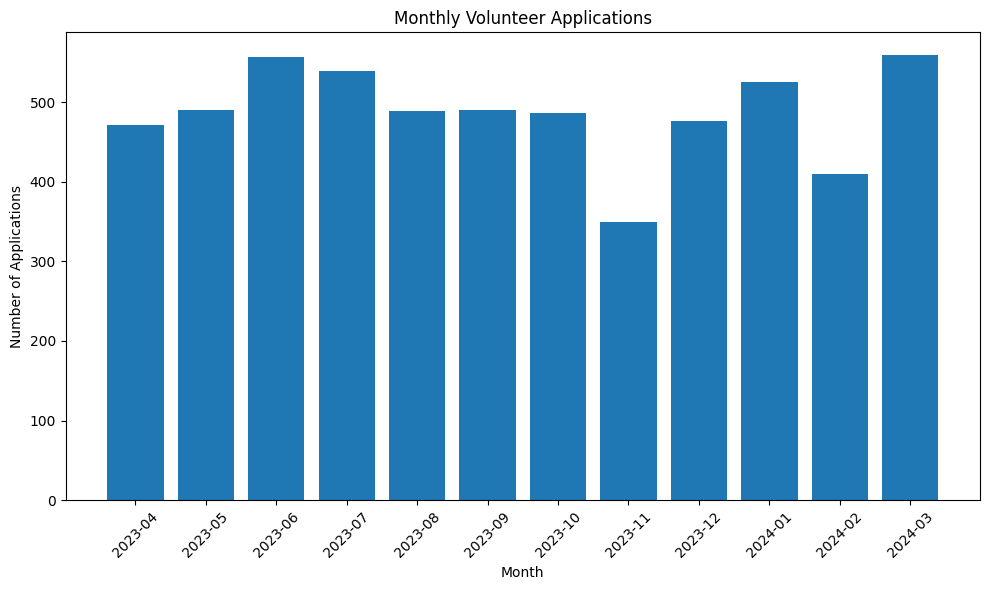

In [18]:
df['Volunteer Application: Created Date'] = pd.to_datetime(df['Volunteer Application: Created Date'], errors='coerce')

# Drop rows where 'Volunteer Application: Created Date' could not be converted to datetime
df.dropna(subset=['Volunteer Application: Created Date'], inplace=True)

# Extract 'Month' and 'Year' from 'Volunteer Application: Created Date'
df['YearMonth'] = df['Volunteer Application: Created Date'].dt.to_period('M')

# Group by 'YearMonth' and count applications
monthly_applications = df.groupby('YearMonth').size().reset_index(name='Number of Applications')

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(monthly_applications['YearMonth'].astype(str), monthly_applications['Number of Applications'])
plt.title('Monthly Volunteer Applications')
plt.xlabel('Month')
plt.ylabel('Number of Applications')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to ensure everything fits without overlapping
plt.show()

**Correlation Analysis:**
**Here we see if there's a correlation between the number of applications and the success rate of onboarding.**


In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5846 entries, 0 to 5845
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Volunteer Application: Created Date   5846 non-null   datetime64[ns]
 1   Application Status                    5846 non-null   object        
 2   Birthdate                             5846 non-null   object        
 3   First Name                            5846 non-null   object        
 4   Current City India                    4440 non-null   object        
 5   Preferred Clusters                    4443 non-null   object        
 6   Availability                          5846 non-null   object        
 7   1st Subject Preference                5846 non-null   object        
 8   Subject 2 Preference                  5846 non-null   object        
 9   Volunteer willing to start on         679 non-null    object        
 10  

**Replace 'Applications' and 'OnboardingSuccess' with the actual column names I want to calculate correlations for,**

**For example, if I want to calculate correlations between 'Campaign Cohort' and 'Month'**


**Calculate correlation matrix**

In [10]:
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Display correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                                      Campaign Cohort  \
Campaign Cohort                                   1.0   
Currently studying/working in India?              NaN   

                                      Currently studying/working in India?  
Campaign Cohort                                                        NaN  
Currently studying/working in India?                                   NaN  


 **Visualize the correlation matrix using a heatmap**

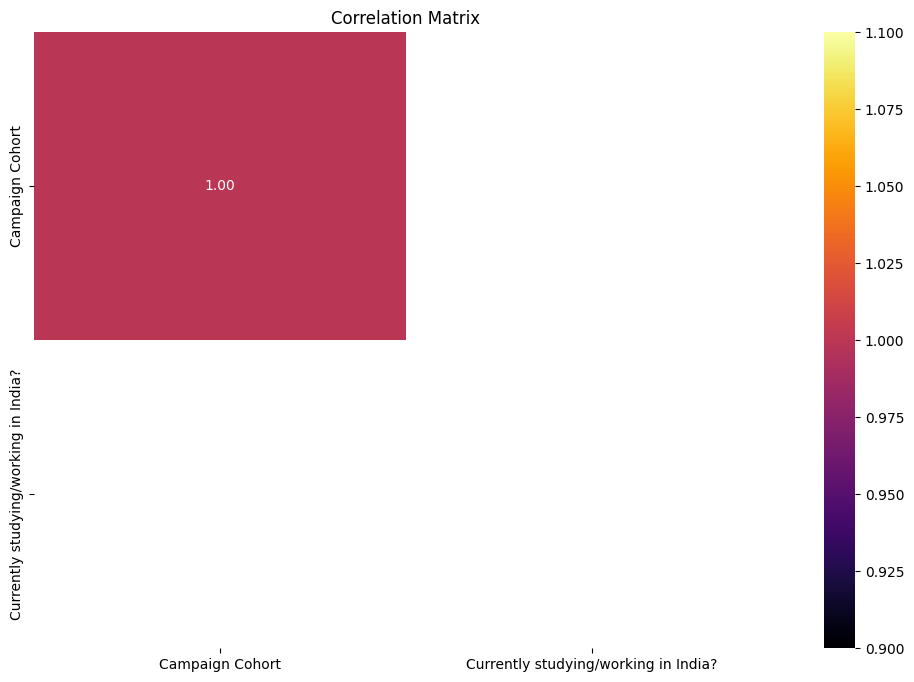

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()